In [1]:
%load_ext cython

In [2]:
import gwsurrogate
import numpy as np

from math import cos
from math import sin
from math import sqrt
from math import factorial
from math import pi
from math import e
from numpy import conj

import bilby
import WaVel

import matplotlib.pyplot as plt
%matplotlib inline

# Define constants: speed of light (in m/s), gravitational constant (in m^3/(kg*s^2)), solar mass (in kg) and megaparsec (in m)
c = 2.99e8
G = 6.67e-11
M_sun = 1.99e30
Mpc = 3.09e22

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [3]:
# Define labels, sampling frequency and times
outdir = 'outdir'
label = 'moving_bbh'
sampling_frequency = 1024
duration = 2.0
geocent_time = 0.0
start_time = geocent_time - duration + 0.02

In [4]:
# Load the surrogate model
surrogate = gwsurrogate.LoadSurrogate('NRHybSur3dq8')

# Define the time-domain model
def moving_bbh(times, mass, ratio, distance, theta, phi, speed, v_the, v_phi):

    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]

    return {'plus': h_plus, 'cross': h_cross}

Loaded NRHybSur3dq8 model


In [5]:
moving_bbh(np.array([-1000,-500]),650,6,300,45,45,3000,0,0) 

{'plus': array([-9.70664572e-22,  1.07894238e-21]),
 'cross': array([1.74790847e-22, 1.50404401e-22])}

In [7]:
np.linspace(-1000.0,-100.0,10)

array([-1000.,  -900.,  -800.,  -700.,  -600.,  -500.,  -400.,
        -300.,  -200.,  -100.])

In [6]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 0.5841


In [5]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 26.1352


In [8]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 7.7819


In [10]:
# Define parameters to inject
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)
# Generate model with waveform_generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, time_domain_source_model=moving_bbh, start_time=start_time)
# Inject signal into ifos
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

15:30 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.moving_bbh
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
15:30 bilby INFO    : Injected signal in H1:
15:30 bilby INFO    :   optimal SNR = 31.29
15:30 bilby INFO    :   matched filter SNR = 32.62+0.36j
15:30 bilby INFO    :   mass = 50
15:30 bilby INFO    :   ratio = 6
15:30 bilby INFO    :   distance = 300
15:30 bilby INFO    :   theta = 45
15:30 bilby INFO    :   phi = 45
15:30 bilby INFO    :   speed = 3000
15:30 bilby INFO    :   v_the = 0
15:30 bilby INFO    :   v_phi = 0
15:30 bilby INFO    :   ra = 0
15:30 bilby INFO    :   dec = 0
15:30 bilby INFO    :   psi = 0
15:30 bilby INFO    :   geocent_time = 0.0
15:30 bilby INFO    : Injected signal in L1:
15:30 bilby INFO    :   optimal SNR = 37.61
15:30 bilby INFO    :   matched filter SNR = 37.26-2.15j
15:30 bilby INFO    :   mass = 50
15:30 bilby INFO    :   ra

[{'plus': array([1.37548862e-24+0.00000000e+00j,
         1.35948233e-24+2.58315799e-27j,
         1.36053991e-24-2.24262785e-26j, ...,
         3.42118219e-25-4.42243700e-26j,
         3.44094163e-25-2.21504903e-26j,
         3.44753569e-25+0.00000000e+00j]),
  'cross': array([ 2.18896011e-25+0.00000000e+00j,
          2.24769528e-25+2.81040869e-26j,
          2.28607991e-25+6.46158117e-26j, ...,
         -6.03963749e-26+2.02828854e-26j,
         -6.15146180e-26+1.01674966e-26j,
         -6.18879997e-26+0.00000000e+00j])},
 {'plus': array([1.37548862e-24+0.00000000e+00j,
         1.35948233e-24+2.58315799e-27j,
         1.36053991e-24-2.24262785e-26j, ...,
         3.42118219e-25-4.42243700e-26j,
         3.44094163e-25-2.21504903e-26j,
         3.44753569e-25+0.00000000e+00j]),
  'cross': array([ 2.18896011e-25+0.00000000e+00j,
          2.24769528e-25+2.81040869e-26j,
          2.28607991e-25+6.46158117e-26j, ...,
         -6.03963749e-26+2.02828854e-26j,
         -6.15146180e-26+1.

15:30 bilby INFO    : Injected signal in H1:
15:30 bilby INFO    :   optimal SNR = 31.29
15:30 bilby INFO    :   matched filter SNR = 63.91+0.36j
15:30 bilby INFO    :   mass = 50
15:30 bilby INFO    :   ratio = 6
15:30 bilby INFO    :   distance = 300
15:30 bilby INFO    :   theta = 45
15:30 bilby INFO    :   phi = 45
15:30 bilby INFO    :   speed = 3000
15:30 bilby INFO    :   v_the = 0
15:30 bilby INFO    :   v_phi = 0
15:30 bilby INFO    :   ra = 0
15:30 bilby INFO    :   dec = 0
15:30 bilby INFO    :   psi = 0
15:30 bilby INFO    :   geocent_time = 0.0
15:30 bilby INFO    : Injected signal in L1:
15:30 bilby INFO    :   optimal SNR = 37.61
15:30 bilby INFO    :   matched filter SNR = 74.87-2.15j
15:30 bilby INFO    :   mass = 50
15:30 bilby INFO    :   ratio = 6
15:30 bilby INFO    :   distance = 300
15:30 bilby INFO    :   theta = 45
15:30 bilby INFO    :   phi = 45
15:30 bilby INFO    :   speed = 3000
15:30 bilby INFO    :   v_the = 0
15:30 bilby INFO    :   v_phi = 0
15:30 bilb

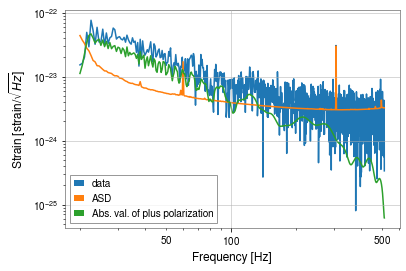

In [11]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

#ax.set_xlim(minimum_frequency,maximum_frequency)
#ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [12]:
# Create priors
prior = injection_parameters.copy()
prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
#prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
# Define likelihood
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
# Launch sampler
result = bilby.core.sampler.run_sampler(likelihood, prior, sampler='dynesty', npoints=500, injection_parameters=injection_parameters, outdir=outdir, label=label, dlogz=3, npool=16)

15:12 bilby INFO    : Running for label 'moving_bbh', output will be saved to 'outdir'
15:12 bilby INFO    : Using lal version 6.21.0
15:12 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:12 bilby INFO    : Using lalsimulation version 1.10.0
15:12 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:12 bilby INFO    : Search parameters:
15:12 bilby INFO    :   mass = Uniform(minimum=45, maximum=55, name='$M$', latex_label='$M$', unit='$M_sun$', boundary=None)
15:12 bilby INFO    :   ratio = 6
15:12 bilby INFO    :   distance = 300
15:12 bilby INFO    :   theta = 45
15:12 bilby INFO    :   phi = 45
15:12 bilby INFO    :   speed = 3000
15:12 bil

Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
Loaded NRHybSur3dq8 model
